# 분류문제

## 분석 데이터 검토

In [1]:
import pandas as pd
data = pd.read_csv('breast-cancer-wisconsin.csv')
data.head()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [2]:
data['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

In [3]:
print(data.shape)

(683, 11)


## 특성(x)과 레이블(y) 나누기

In [4]:
# 방법1: 특성 이름으로 특성 데이터셋(X) 나누기
X1 = data[['Clump_Thickness', 'Cell_Size', 'Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']]

In [5]:
# 방법2: 특성 위치 값으로 특성 데이터셋(X) 나누기
X2 = data[data.columns[1:10]]

In [6]:
# 방법3: loc 함수로 특성 데이터셋(X) 나누기(단, 불러올 특성이 연달아 있어야 한다.)
X3 = data.loc[:, 'Clump_Thickness':'Mitoses']

In [7]:
print(X1.shape)
print(X2.shape)
print(X3.shape)

(683, 9)
(683, 9)
(683, 9)


In [8]:
y = data[['Class']]

In [9]:
print(y.shape)

(683, 1)


## train-test 데이터셋 나누기

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, stratify=y, random_state=1) 

In [11]:
# stratify=y를 썼기 때문에
print(y_train.mean())
print(y_test.mean())

Class    0.349609
dtype: float64
Class    0.350877
dtype: float64


## 정규화

### train data 정규화

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [13]:
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

In [14]:
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)

In [15]:
scaler_standard.fit(X_train)
X_scaled_standard_train = scaler_standard.transform(X_train)

In [16]:
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.387804,0.236328,0.244358,0.203342,0.247830,0.281901,0.274306,0.202257,0.059245
std,0.316871,0.337717,0.330519,0.316500,0.247273,0.405302,0.270273,0.334219,0.169946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.055556,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.361111,0.444444,0.333333,0.333333,0.555556,0.444444,0.250000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4,5,6,7,8
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02
mean,2.081668e-17,-5.204170e-18,-3.469447e-17,1.734723e-17,-3.989864e-17,-3.469447e-18,-6.938894e-18,-1.387779e-17,6.938894e-18
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00
min,-1.225052e+00,-7.004667e-01,-7.400371e-01,-6.431001e-01,-1.003233e+00,-6.962132e-01,-1.015914e+00,-6.057549e-01,-3.489511e-01
25%,-8.740575e-01,-7.004667e-01,-7.400371e-01,-6.431001e-01,-5.534473e-01,-6.962132e-01,-6.044048e-01,-6.057549e-01,-3.489511e-01
50%,-1.720694e-01,-7.004667e-01,-5.717871e-01,-6.431001e-01,-5.534473e-01,-6.962132e-01,-1.928951e-01,-6.057549e-01,-3.489511e-01
75%,5.299188e-01,3.698516e-01,6.059629e-01,4.111174e-01,3.461242e-01,6.758467e-01,6.301241e-01,1.429894e-01,-3.489511e-01
max,1.933895e+00,2.263492e+00,2.288463e+00,2.519552e+00,3.044839e+00,1.773495e+00,2.687672e+00,2.389222e+00,5.541037e+00


### test data 정규화

In [18]:
X_scaled_minmax_test = scaler_minmax.transform(X_test)
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.366472,0.246914,0.251462,0.203379,0.249513,0.285250,0.263808,0.224172,0.090318
std,0.303189,0.349868,0.337572,0.324511,0.246940,0.404763,0.278502,0.354138,0.247282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
75%,0.555556,0.444444,0.444444,0.333333,0.333333,0.611111,0.444444,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
X_scaled_standard_test = scaler_standard.transform(X_test)
pd.DataFrame(X_scaled_standard_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,-0.067387,0.031375,0.021516,0.000116,0.006812,0.008271,-0.038880,0.065634,0.183023
std,0.957759,1.036995,1.022337,1.026315,0.999630,0.999645,1.031456,1.060635,1.456487
min,-1.225052,-0.700467,-0.740037,-0.643100,-1.003233,-0.696213,-1.015914,-0.605755,-0.348951
25%,-0.874057,-0.700467,-0.740037,-0.643100,-0.553447,-0.696213,-1.015914,-0.605755,-0.348951
50%,-0.172069,-0.700467,-0.740037,-0.643100,-0.553447,-0.696213,-0.604405,-0.605755,-0.348951
75%,0.529919,0.616848,0.605963,0.411117,0.346124,0.813053,0.630124,0.392571,-0.348951
max,1.933895,2.263492,2.288463,2.519552,3.044839,1.773495,2.687672,2.389222,5.541037


## 모델 학습

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression()
model.fit(X_scaled_minmax_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [22]:
pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.970703125

In [23]:
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

0.9590643274853801

In [24]:
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
confusion_train

array([[327,   6],
       [  9, 170]])

In [25]:
confusion_test = confusion_matrix(y_test, pred_test)
confusion_test

array([[107,   4],
       [  3,  57]])

In [26]:
from sklearn.metrics import classification_report
cfreport_train = classification_report(y_train, pred_train)
cfreport_train

'              precision    recall  f1-score   support\n\n           0       0.97      0.98      0.98       333\n           1       0.97      0.95      0.96       179\n\n    accuracy                           0.97       512\n   macro avg       0.97      0.97      0.97       512\nweighted avg       0.97      0.97      0.97       512\n'

In [27]:
cfreport_test = classification_report(y_test, pred_test)
cfreport_test

'              precision    recall  f1-score   support\n\n           0       0.97      0.96      0.97       111\n           1       0.93      0.95      0.94        60\n\n    accuracy                           0.96       171\n   macro avg       0.95      0.96      0.96       171\nweighted avg       0.96      0.96      0.96       171\n'

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.decision_function(X_scaled_minmax_test))
roc_auc = metrics.roc_auc_score(y_test, model.decision_function(X_scaled_minmax_test))
roc_auc

0.9921921921921922

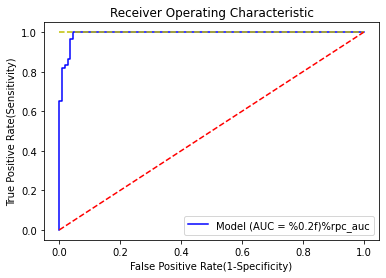

In [29]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model (AUC = %0.2f)%rpc_auc')
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

## 예측값 병합 및 저장

In [30]:
prob_train = model.predict_proba(X_scaled_minmax_train)
y_train['y_pred'] = pred_train
y_train[['y_prob0','y_prob1']] = prob_train
y_train

,Class,y_pred,y_prob0,y_prob1
451,1,1,0.004825,0.995175
647,0,0,0.986133,0.013867
381,0,0,0.984219,0.015781
269,0,0,0.989189,0.010811
588,1,1,0.133310,0.866690
...,...,...,...,...
7,0,0,0.982374,0.017626
627,0,0,0.992403,0.007597
43,0,0,0.990204,0.009796
204,1,1,0.000194,0.999806


In [31]:
prob_test = model.predict_proba(X_scaled_minmax_test)
y_test['y_pred'] = pred_test
y_test[['y_prob0','y_prob1']] = prob_test
y_test

,Class,y_pred,y_prob0,y_prob1
202,0,0,0.990514,0.009486
218,1,1,0.004424,0.995576
1,0,1,0.101438,0.898562
523,0,0,0.979211,0.020789
619,0,0,0.975059,0.024941
...,...,...,...,...
435,0,0,0.974925,0.025075
137,0,0,0.986759,0.013241
420,1,1,0.008361,0.991639
568,0,0,0.986759,0.013241


In [32]:
total_test = pd.concat([X_test,y_test],axis=1)
total_test

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,y_pred,y_prob0,y_prob1
202,1,1,1,1,1,1,3,1,1,0,0,0.990514,0.009486
218,10,5,5,6,3,10,7,9,2,1,1,0.004424,0.995576
1,5,4,4,5,7,10,3,2,1,0,1,0.101438,0.898562
523,4,1,1,1,2,1,2,1,1,0,0,0.979211,0.020789
619,3,1,4,1,2,1,1,1,1,0,0,0.975059,0.024941
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,4,1,1,3,1,1,2,1,1,0,0,0.974925,0.025075
137,3,1,1,1,2,1,1,1,1,0,0,0.986759,0.013241
420,10,8,10,1,3,10,5,1,1,1,1,0.008361,0.991639
568,3,1,1,1,2,1,1,1,1,0,0,0.986759,0.013241


In [33]:
total_test.to_csv('classification_test.csv')